This analysis presents an A/B testing analysis to evaluate whether changing the background color of a retail website affects user engagement. In particular, we aim to determine if a darker background (black) improves the likelihood of users completing a desired action (conversion) compared to the standard white background.

- Group A (Control): Users who saw the website with a white background.
- Group B (Treatment): Users who saw the website with a black background.

In [ ]:
import pandas as pd
## Dataset from Kaggle
## https://gts.ai/dataset-download/ab-testing-dataset/
## https://www.kaggle.com/datasets/adarsh0806/ab-testing-practice
# Load the dataset
file_path = "ab_testing.csv"
df = pd.read_csv(file_path)

df


,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [ ]:
df.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


In [ ]:
# Convert non-numeric columns to categorical types
categorical_columns = ['Group', 'Conversion', 'Device', 'Location']
df[categorical_columns] = df[categorical_columns].astype('category')

# Confirm the data types have been updated
df.dtypes


,0
User ID,int64
Group,category
Page Views,int64
Time Spent,int64
Conversion,category
Device,category
Location,category


In [ ]:
# Create individual DataFrames for each categorical column
group_summary = pd.DataFrame({
    'Count': df['Group'].value_counts(),
    'Frequency (%)': (df['Group'].value_counts(normalize=True) * 100).round(2)
})

conversion_summary = pd.DataFrame({
    'Count': df['Conversion'].value_counts(),
    'Frequency (%)': (df['Conversion'].value_counts(normalize=True) * 100).round(2)
})

device_summary = pd.DataFrame({
    'Count': df['Device'].value_counts(),
    'Frequency (%)': (df['Device'].value_counts(normalize=True) * 100).round(2)
})

location_summary = pd.DataFrame({
    'Count': df['Location'].value_counts(),
    'Frequency (%)': (df['Location'].value_counts(normalize=True) * 100).round(2)
})

group_summary


,Count,Frequency (%)
Group,,
A,2519,50.38
B,2481,49.62


In [ ]:
conversion_summary

,Count,Frequency (%)
Conversion,,
No,4515,90.3
Yes,485,9.7


In [ ]:
device_summary

,Count,Frequency (%)
Device,,
Desktop,2538,50.76
Mobile,2462,49.24


In [ ]:
location_summary

,Count,Frequency (%)
Location,,
Scotland,1281,25.62
England,1246,24.92
Northern Ireland,1242,24.84
Wales,1231,24.62


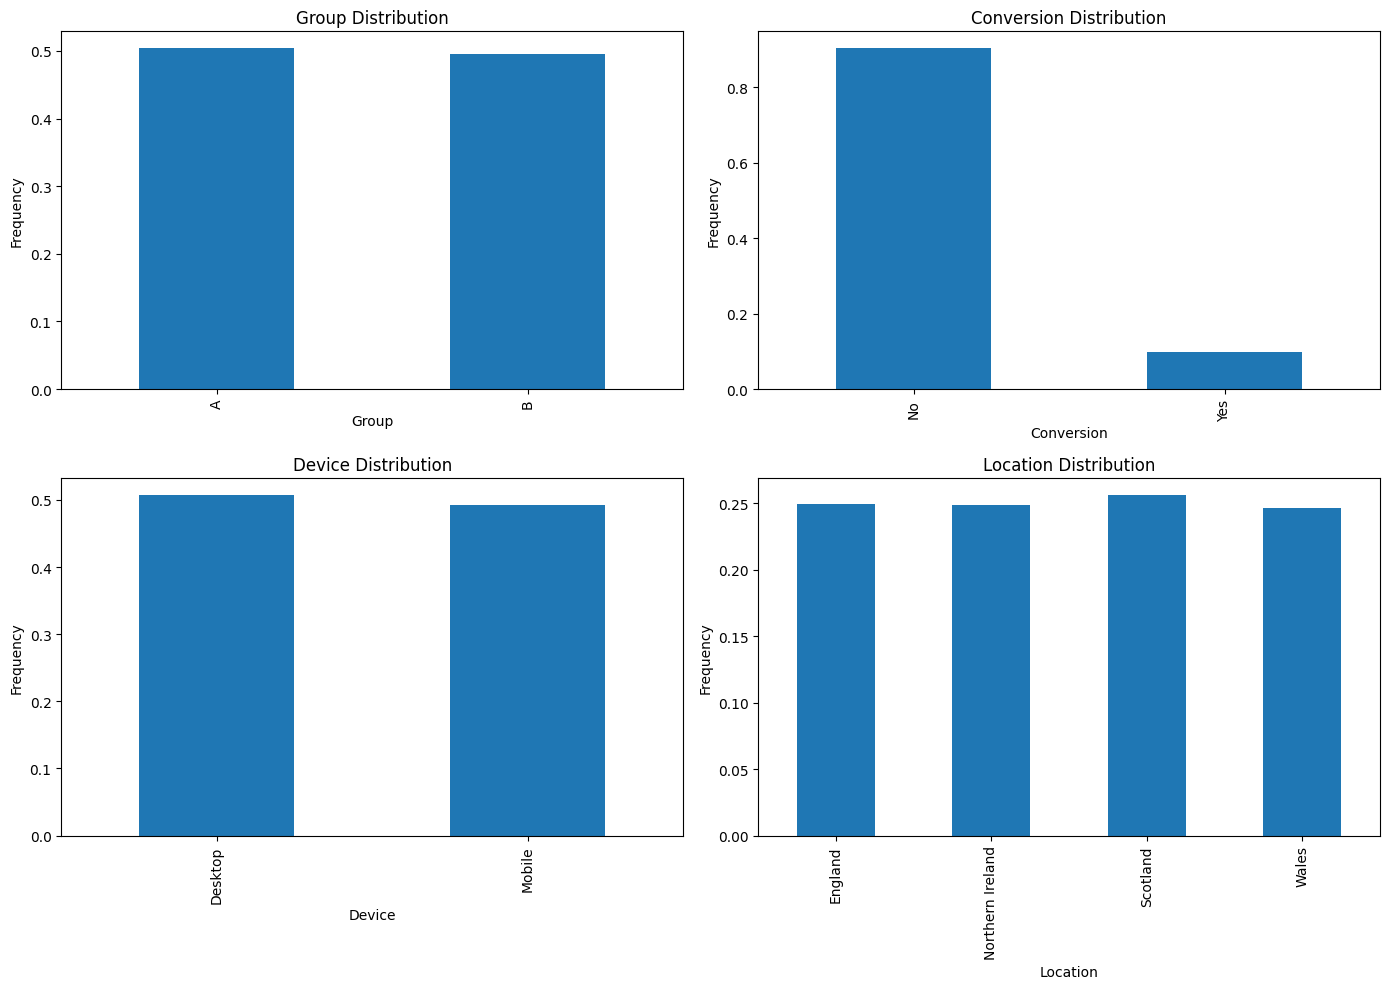

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(14, 10))

# Plot for Group
plt.subplot(2, 2, 1)
df['Group'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Group Distribution')
plt.ylabel('Frequency')
plt.xlabel('Group')

# Plot for Conversion
plt.subplot(2, 2, 2)
df['Conversion'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Conversion Distribution')
plt.ylabel('Frequency')
plt.xlabel('Conversion')

# Plot for Device
plt.subplot(2, 2, 3)
df['Device'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Device Distribution')
plt.ylabel('Frequency')
plt.xlabel('Device')

# Plot for Location
plt.subplot(2, 2, 4)
df['Location'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Location Distribution')
plt.ylabel('Frequency')
plt.xlabel('Location')

plt.tight_layout()
plt.show()


<ipython-input-15-142a4451c927>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_by_group = df.groupby('Group')['Conversion'].value_counts(normalize=True).unstack()['Yes']


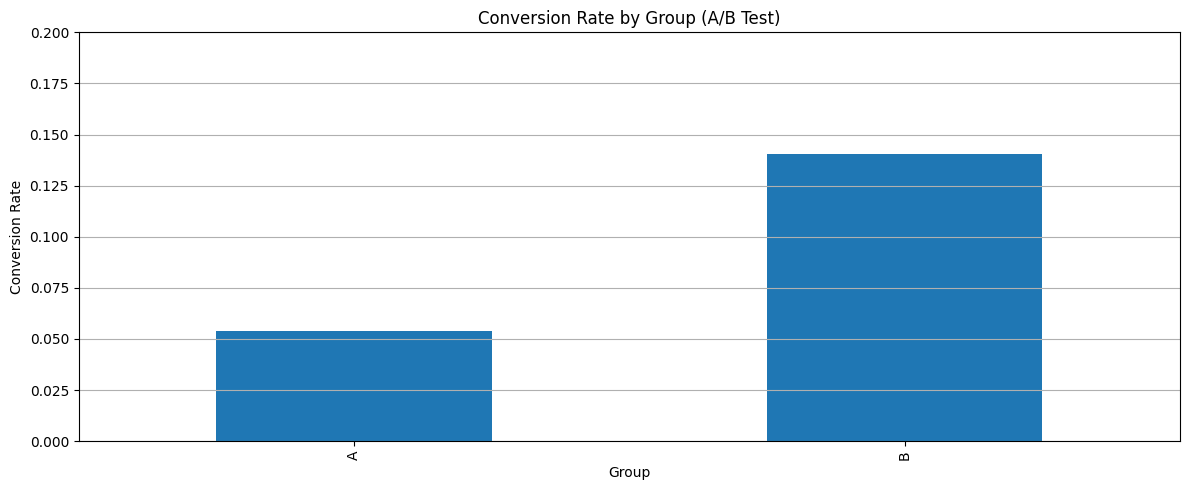

In [ ]:
# Set up the figure size for A/B comparison
plt.figure(figsize=(12, 5))

# Conversion rate by group
conversion_rate_by_group = df.groupby('Group')['Conversion'].value_counts(normalize=True).unstack()['Yes']

# Bar plot for conversion rate
conversion_rate_by_group.plot(kind='bar')
plt.title('Conversion Rate by Group (A/B Test)')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, 0.2)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

# Prepare data for tests
conversion_counts = df.groupby('Group')['Conversion'].value_counts().unstack()
successes = conversion_counts['Yes'].values  # Number of conversions
totals = conversion_counts.sum(axis=1).values  # Total users in each group

# ---- Proportion Z-Test ----
# H0: p_A = p_B (conversion rates are equal)
# H1: p_A ≠ p_B (conversion rates are different)
z_stat, p_ztest = proportions_ztest(successes, totals)

# ---- Chi-Squared Test of Independence ----
# H0: Conversion is independent of Group
# H1: Conversion is dependent on Group
chi2_stat, p_chi2, dof, expected = chi2_contingency(conversion_counts)

{
    "Proportion Z-Test": {
        "Null Hypothesis": "Conversion rates are equal between Group A and Group B.",
        "Alternative Hypothesis": "Conversion rates are different between Group A and Group B.",
        "Z-Statistic": round(z_stat, 4),
        "P-Value": round(p_ztest, 4)
    },
    "Chi-Squared Test": {
        "Null Hypothesis": "Conversion is independent of group assignment (A/B).",
        "Alternative Hypothesis": "Conversion is dependent on group assignment (A/B).",
        "Chi2 Statistic": round(chi2_stat, 4),
        "Degrees of Freedom": dof,
        "P-Value": round(p_chi2, 4)
    }
}


<ipython-input-16-5fffa5202572>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_counts = df.groupby('Group')['Conversion'].value_counts().unstack()


{'Proportion Z-Test': {'Null Hypothesis': 'Conversion rates are equal between Group A and Group B.',
  'Alternative Hypothesis': 'Conversion rates are different between Group A and Group B.',
  'Z-Statistic': np.float64(-10.3545),
  'P-Value': np.float64(0.0)},
 'Chi-Squared Test': {'Null Hypothesis': 'Conversion is independent of group assignment (A/B).',
  'Alternative Hypothesis': 'Conversion is dependent on group assignment (A/B).',
  'Chi2 Statistic': np.float64(106.2281),
  'Degrees of Freedom': 1,
  'P-Value': np.float64(0.0)}}


## Statistical Tests
The cell above runs the following tests
### **Proportion Z-Test**
- **Null Hypothesis (H₀)**: Conversion rates are equal between Group A and Group B.
- **Alternative Hypothesis (H₁)**: Conversion rates are different between Group A and Group B.
- **Z-Statistic**: -10.3545  
- **P-Value**: < 0.0001

**Interpretation**: Since the p-value is effectively **0**, we **reject the null hypothesis** — there is strong evidence that conversion rates differ significantly between the groups.

---

### **Chi-Squared Test of Independence**
- **Null Hypothesis (H₀)**: Conversion is independent of group assignment (A/B).
- **Alternative Hypothesis (H₁)**: Conversion is dependent on group assignment (A/B).
- **Chi-Squared Statistic**: 106.2281  
- **Degrees of Freedom**: 1  
- **P-Value**: < 0.0001

**Interpretation**: Again, we **reject the null hypothesis** — group assignment and conversion are not independent; the background color seems to affect user behavior.



In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Convert 'Conversion' to binary: 1 = Yes, 0 = No
df['Conversion_binary'] = df['Conversion'].apply(lambda x: 1 if x == 'Yes' else 0)

# Make sure it's treated as numeric (if not already)
df['Conversion_binary'] = pd.to_numeric(df['Conversion_binary'], errors='coerce')

# Run the logistic regression: Conversion ~ Group
# Group A is treated as the baseline, and Group B is compared against it
logit_model = smf.logit("Conversion_binary ~ C(Group)", data=df).fit()

# Show model summary
print(logit_model.summary2())


Optimization terminated successfully.
         Current function value: 0.307393
         Iterations 7
                          Results: Logit
Model:              Logit             Method:           MLE       
Dependent Variable: Conversion_binary Pseudo R-squared: 0.035     
Date:               2025-04-14 13:21  AIC:              3077.9257 
No. Observations:   5000              BIC:              3090.9601 
Df Model:           1                 Log-Likelihood:   -1537.0   
Df Residuals:       4998              LL-Null:          -1592.2   
Converged:          1.0000            LLR p-value:      7.6810e-26
No. Iterations:     7.0000            Scale:            1.0000    
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -2.8635   0.0882 -32.4794 0.0000 -3.0363 -2.6907
C(Group)[T.B]      1.0537   0.1054   9.9983 0.0000  0

### **Model: Conversion_binary ~ C(Group)**

$$
\text{Conversion}_i = \beta_0 + \beta_1 \cdot \text{GroupB}_i + \varepsilon_i
$$

Where:

- $\text{Conversion}_i$ is a binary variable (1 if user $i$ converted, 0 otherwise)
- $\text{GroupB}_i = 1$ if user $i$ is in Group B (treatment), and 0 if in Group A (control)
- $\beta_0 = -2.8635$: Intercept term (log-odds of conversion for Group A)
- $\beta_1 = 1.0537$: Effect of being in Group B on the log-odds of conversion
- $\varepsilon_i$ is the error term

- **Intercept**: -2.8635  
- **C(Group)[T.B]**: **1.0537**, *p* < 0.0001  
- **Pseudo R²**: 0.035  
- **Log-Likelihood Ratio Test p-value**: < 0.0001  

---

### Interpretation:
- The **baseline group (A)** has a log-odds of conversion of **-2.86**.
- The **coefficient for Group B** is **+1.05**, which translates to a significantly higher chance of conversion.
- Converting log-odds to **odds ratio**:  
  $$
  \text{Odds Ratio} = e^{1.0537} \approx 2.87
  $$


This means users in **Group B** are **~2.87 times more likely** to convert compared to Group A — holding all else constant.



### Multi-variate Regression

$$
\text{Conversion}_i = \beta_0 + \beta_1 \cdot \text{GroupB}_i + \beta_2 \cdot \text{Mobile}_i + \beta_3 \cdot \text{NI}_i + \beta_4 \cdot \text{Scotland}_i + \beta_5 \cdot \text{Wales}_i + \varepsilon_i
$$

Where:

- **Reference groups**:  
  - Group A (control),  
  - Device = Desktop,  
  - Location = England




In [ ]:
# Run multivariate logistic regression with Group, Device, and Location
logit_model_multi = smf.logit("Conversion_binary ~ C(Group) + C(Device) + C(Location)", data=df).fit()

# Display the summary
logit_model_multi.summary2()


Optimization terminated successfully.
         Current function value: 0.306874
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                    Logit                 Method:               MLE       
Dependent Variable:       Conversion_binary     Pseudo R-squared:     0.036     
Date:                     2025-04-14 13:37      AIC:                  3080.7433 
No. Observations:         5000                  BIC:                  3119.8465 
Df Model:                 5                     Log-Likelihood:       -1534.4   
Df Residuals:             4994                  LL-Null:              -1592.2   
Converged:                1.0000                LLR p-value:          2.5970e-23
No. Iterations:           7.0000                Scale:                1.0000    
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       -2.7288   0.1283 -21.2749 0.0000 -2.9802 -2.4774
C(Group)[T.B]                    1.0538   0.1055   9.9877 0.0000  0.8470  1.2606
C(Device)[T.Mobile]             -0.0362   0.0968  -0.3741 0.7083 -0.2259  0.1535
C(Location)[T.Northern Ireland] -0.3023   0.1387  -2.1798 0.0293 -0.5742 -0.0305
C(Location)[T.Scotland]         -0.0911   0.1324  -0.6884 0.4912 -0.3506  0.1684
C(Location)[T.Wales]            -0.0947   0.1335  -0.7093 0.4781 -0.3564  0.1670
================================================================================

"""

### Interpretation

- The effect of **Group B remains strong and significant** — background color has a meaningful effect even after controlling for device and location.
- **Device type** does **not** significantly impact conversion.
- **Northern Ireland** users have a **significantly lower conversion rate** compared to users in England.



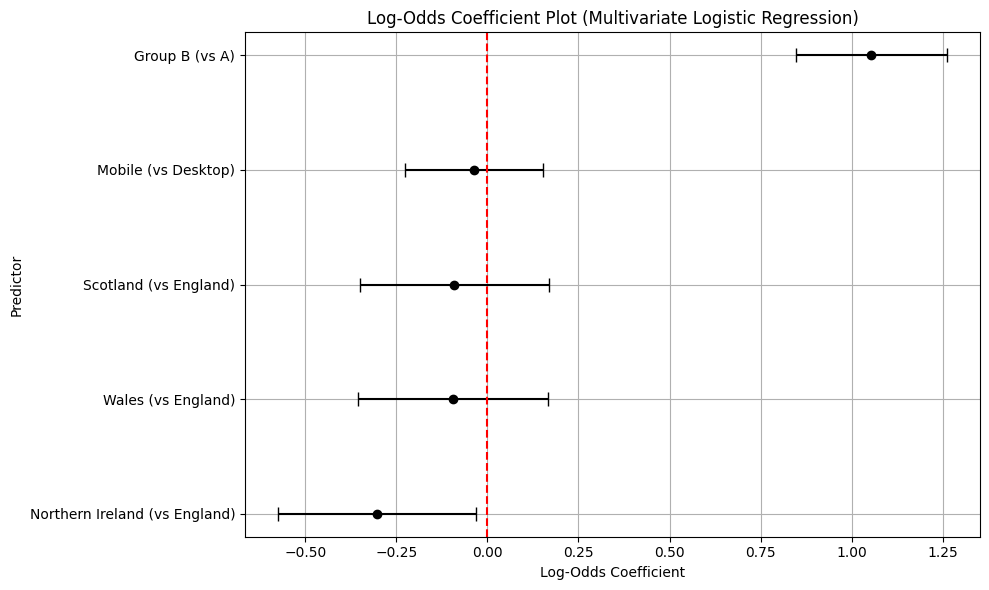

In [ ]:

# Extract coefficients and confidence intervals
coefs = logit_model_multi.params
conf = logit_model_multi.conf_int()
conf.columns = ['CI Lower', 'CI Upper']

# Combine into one DataFrame
coef_summary = pd.DataFrame({
    'Coefficient': coefs,
    'CI Lower': conf['CI Lower'],
    'CI Upper': conf['CI Upper']
}).drop(index='Intercept')  # Exclude intercept for cleaner plot

# Sort by effect size for better visualization
coef_summary = coef_summary.sort_values(by='Coefficient')


# Clean up and customize predictor labels for clarity
label_map = {
    'C(Group)[T.B]': 'Group B (vs A)',
    'C(Device)[T.Mobile]': 'Mobile (vs Desktop)',
    'C(Location)[T.Northern Ireland]': 'Northern Ireland (vs England)',
    'C(Location)[T.Scotland]': 'Scotland (vs England)',
    'C(Location)[T.Wales]': 'Wales (vs England)'
}

# Apply new labels
coef_summary.index = coef_summary.index.to_series().map(label_map)

# Sort again just in case
coef_summary = coef_summary.sort_values(by='Coefficient')

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(coef_summary['Coefficient'], coef_summary.index,
             xerr=[coef_summary['Coefficient'] - coef_summary['CI Lower'],
                   coef_summary['CI Upper'] - coef_summary['Coefficient']],
             fmt='o', color='black', capsize=5)

plt.axvline(x=0, color='red', linestyle='--')
plt.title('Log-Odds Coefficient Plot (Multivariate Logistic Regression)')
plt.xlabel('Log-Odds Coefficient')
plt.ylabel('Predictor')
plt.grid(True)
plt.tight_layout()
plt.show()




### Interpretation:
- Each point represents a predictor’s estimated effect on the **log-odds of conversion**.
- Horizontal lines are **95% confidence intervals**.
- The **red dashed line at 0** marks no effect.
- If the CI crosses 0 → the effect is **not statistically significant**.

**Group B** stands out with a strong positive effect.  

Other variables (like device or location) show smaller or insignificant effects.



Heteregenous Treatment effects:

1. Group × Device
2. Group × Location

### **Econometric Equation (Group × Device):**

$$
\text{Conversion}_i = \beta_0 + \beta_1 \cdot \text{GroupB}_i + \beta_2 \cdot \text{Mobile}_i + \beta_3 \cdot (\text{GroupB}_i \times \text{Mobile}_i) + \beta_4 \cdot \text{NI}_i + \beta_5 \cdot \text{Scotland}_i + \beta_6 \cdot \text{Wales}_i + \varepsilon_i
$$

Where:

- $\text{GroupB}_i = 1$ if user \(i\) is in **Group B**, 0 if in Group A
- $\text{Mobile}_i = 1$ if user is on mobile, 0 if on desktop
- $\text{GroupB}_i \times \text{Mobile}_i$ is the interaction term
- $\text{NI}_i = 1$ if user is in **Northern Ireland**, 0 otherwise
- $\text{Scotland}_i = 1$, $\text{Wales}_i = 1$ are dummies
- The reference location is **England**
- $\varepsilon_i$ is the error term



In [ ]:
# Logistic regression with interaction (Group × Device) and controlling for Location
logit_interact_device_ctrl = smf.logit(
    "Conversion_binary ~ C(Group) * C(Device) + C(Location)",
    data=df
).fit()

# Display the summary
logit_interact_device_ctrl.summary2()



Optimization terminated successfully.
         Current function value: 0.306766
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                    Logit                  Method:                MLE       
Dependent Variable:       Conversion_binary      Pseudo R-squared:      0.037     
Date:                     2025-04-14 13:41       AIC:                   3081.6615 
No. Observations:         5000                   BIC:                   3127.2818 
Df Model:                 6                      Log-Likelihood:        -1533.8   
Df Residuals:             4993                   LL-Null:               -1592.2   
Converged:                1.0000                 LLR p-value:           7.8521e-23
No. Iterations:           7.0000                 Scale:                 1.0000    
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                         -2.6537   0.1450 -18.2977 0.0000 -2.9380 -2.3695
C(Group)[T.B]                      0.9482   0.1450   6.5378 0.0000  0.6639  1.2324
C(Device)[T.Mobile]               -0.1899   0.1769  -1.0735 0.2831 -0.5365  0.1568
C(Location)[T.Northern Ireland]   -0.3053   0.1387  -2.2009 0.0277 -0.5772 -0.0334
C(Location)[T.Scotland]           -0.0909   0.1324  -0.6864 0.4925 -0.3504  0.1686
C(Location)[T.Wales]              -0.0963   0.1335  -0.7209 0.4710 -0.3580  0.1655
C(Group)[T.B]:C(Device)[T.Mobile]  0.2197   0.2114   1.0393 0.2987 -0.1946  0.6339
==================================================================================

"""

Controlling for location confirms that the treatment still significantly improves conversion for desktop users. However, device type does not significantly moderate this effect.

###  **Econometric Equation (Group × Location interaction)**

$$
\text{Conversion}_i = \beta_0 + \beta_1 \cdot \text{GroupB}_i + \beta_2 \cdot \text{NI}_i + \beta_3 \cdot \text{Scotland}_i + \beta_4 \cdot \text{Wales}_i + \beta_5 \cdot (\text{GroupB}_i \times \text{NI}_i) + \beta_6 \cdot (\text{GroupB}_i \times \text{Scotland}_i) + \beta_7 \cdot (\text{GroupB}_i \times \text{Wales}_i) + \beta_8 \cdot \text{Mobile}_i + \varepsilon_i
$$

Where:
- Group A and **England** are the reference categories
- $\text{Mobile}_i$ is included as a **control variable**
- All interactions are between **GroupB** and the non-reference locations
- $\varepsilon_i$ is the error term





In [ ]:
# Logistic regression with Group × Location interaction, controlling for Device
logit_interact_location = smf.logit(
    "Conversion_binary ~ C(Group) * C(Location) + C(Device)",
    data=df
).fit()

# Show the summary
logit_interact_location.summary2()


Optimization terminated successfully.
         Current function value: 0.306532
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
==============================================================================================
Model:                        Logit                      Method:                    MLE       
Dependent Variable:           Conversion_binary          Pseudo R-squared:          0.037     
Date:                         2025-04-14 13:53           AIC:                       3083.3216 
No. Observations:             5000                       BIC:                       3141.9764 
Df Model:                     8                          Log-Likelihood:            -1532.7   
Df Residuals:                 4991                       LL-Null:                   -1592.2   
Converged:                    1.0000                     LLR p-value:               5.1171e-22
No. Iterations:               7.0000                     Scale:                     1.0000    
----------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------
Intercept                                     -2.5787   0.1677 -15.3771 0.0000 -2.9074 -2.2501
C(Group)[T.B]                                  0.8363   0.1951   4.2856 0.0000  0.4538  1.2187
C(Location)[T.Northern Ireland]               -0.3387   0.2441  -1.3875 0.1653 -0.8171  0.1397
C(Location)[T.Scotland]                       -0.3633   0.2397  -1.5156 0.1296 -0.8331  0.1065
C(Location)[T.Wales]                          -0.3975   0.2462  -1.6150 0.1063 -0.8800  0.0849
C(Device)[T.Mobile]                           -0.0356   0.0968  -0.3671 0.7135 -0.2254  0.1543
C(Group)[T.B]:C(Location)[T.Northern Ireland]  0.0544   0.2962   0.1836 0.8543 -0.5262  0.6350
C(Group)[T.B]:C(Location)[T.Scotland]          0.3919   0.2876   1.3626 0.1730 -0.1718  0.9556
C(Group)[T.B]:C(Location)[T.Wales]             0.4317   0.2933   1.4720 0.1410 -0.1431  1.0065
==============================================================================================

"""

### Interpretation:
- The **main treatment effect** is again strong and significant (especially in **England**).
- However, none of the **interaction terms are statistically significant** → there's **no strong evidence** that the treatment effect varies by location.
- Control for **device** has little impact.


In [1]:
### Other A/B testing datasets
# Marketing campaing- https://www.kaggle.com/code/yunusemreturkoglu/ab-testing-anova
# Checkout page - https://www.datacamp.com/courses/ab-testing-in-python
#